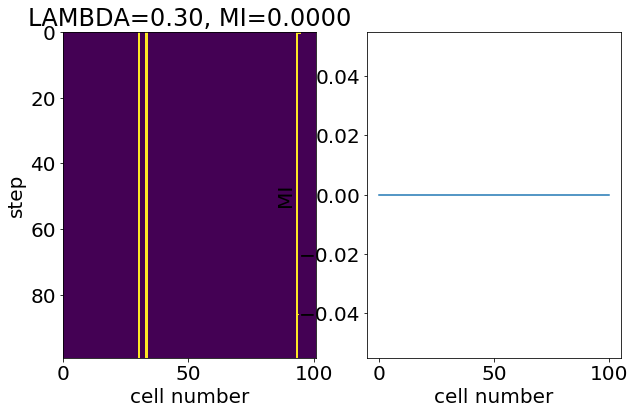

In [127]:
N= 2
K= 3
LAMBDA= 0.30
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import random

def ca_1d(l, t, rule, cell_i,n,k):
    cell= cell_i
    data= [cell]
    for i in range(t):
        cell_next= [0 for i in range(l)]
        for j in range(l):
            if k%2 == 1:
                lis = list(range(int(j-(k-1)/2),int(j+(k-1)/2)+1)) 
                lis = [(item+l) % l for item in lis]
            else:
                lis = list(range(int(j-(k-1)//2-1),int(j+(k-1)/2)+1)) 
                lis = [(item+l) % l for item in lis]
            neighboringstate2 = 0
            for tmp in range(k):
                neighboringstate2 += (n**(k-1-tmp))*cell[lis[tmp]]
            neighboringstate= cell[(j-1+l)%l]*4+cell[j]*2+cell[(j+1)%l]
                
            cell_next[j]= rule[neighboringstate2]
        cell= cell_next
        data.append(cell)
    return(data)
   
 
def calcEntropy(data):
    dic= {}
    for d in data:
        if d in dic:
            dic[d]= dic[d]+1
        else:
            dic[d]= 1
    probdist= np.array(list(dic.values()))/(float)(len(data))
    return(np.sum([-p * np.log2(p) for p in probdist]))
 
def calcJointEntropy(x, y):
    xy= [(x[i], y[i]) for i in range(len(x))]
    return(calcEntropy(xy))
 
def calcMI(x, y):
    return(calcEntropy(x)+calcEntropy(y)-calcJointEntropy(x, y))
 
def calcCAMIList(data):
    milist=[]
    for i in range(len(data[0])): 
        celldata= [data[j][i] for j in range(len(data))]
        milist.append(calcMI(celldata[0:-1], celldata[1:]))
    return(milist) 
 
def calcCAMI(data):
    return(np.average(calcCAMIList(data)))
 
L=101
T=100
SEED=100
rnd.seed(SEED)
  
RNO= 90
RULE= [(0 if rnd.random()<(1.0-LAMBDA) else rnd.randint(1, N-1)) for i in range(N**K)]
  
#[0, 0, ..., 0, 1, 0, ..., 0, 0]
cell_init= [0 for i in range(L)]
# cell_init[L//2]= 1
randint = random.uniform(0,100)
for i in range(int(randint)):
    cell_init[int(random.uniform(0,100))]= 1
  
#random
#cell_init= [rnd.randint(0, 1) for i in range(L)]
  
  
dataXY= ca_1d(L, T, RULE, cell_init,N,K)
CAMIList= calcCAMIList(dataXY)
   
fig= plt.figure(figsize=(10, 6))
ax= fig.add_subplot(1,2,1)
ax.pcolor(np.array(dataXY), vmin = 0, vmax = N-1)
ax.set_xlim(0, L)
ax.set_ylim(T-1, 0)
ax.set_xlabel("cell number")
ax.set_ylabel("step")
ax.set_title("LAMBDA=%1.2f, MI=%1.4f" % (LAMBDA, calcCAMI(dataXY)))
 
ax2= fig.add_subplot(1,2,2)
ax2.plot(CAMIList)
ax2.set_xlabel("cell number")
ax2.set_ylabel("MI")
plt.show()

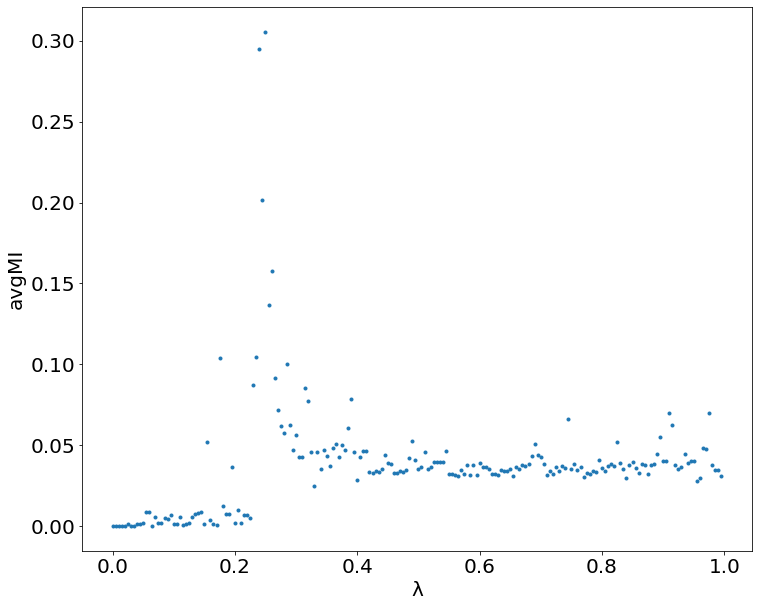

In [119]:
lamdbalist  = [i / 1000 for i in range(0, 1000, 5)]
0
CAAvglist = []
for lamb in lamdbalist:
    L=101
    T=100
    SEED=100
    rnd.seed(SEED)

    RNO= 90
    RULE= [(0 if rnd.random()<(1.0-lamb) else rnd.randint(1, N-1)) for i in range(N**K)]

    #[0, 0, ..., 0, 1, 0, ..., 0, 0]
    cell_init= [0 for i in range(L)]
    # cell_init[L//2]= 1
    randint = random.uniform(0,100)
    for i in range(int(randint)):
        cell_init[int(random.uniform(0,100))]= 1

    #random
    #cell_init= [rnd.randint(0, 1) for i in range(L)]


    dataXY= ca_1d(L, T, RULE, cell_init,N,K)
    CaAvg = calcCAMI(dataXY)
    if (CaAvg >= 1.0):
        print(lamb)
    CAAvglist.append(CaAvg)
plt.rcParams["font.size"] = 20
plt.rcParams['figure.figsize'] = 12,10 
plt.plot(lamdbalist, CAAvglist,'.')
 
plt.xlabel("λ")
plt.ylabel("avgMI")
plt.show()